## PyTorch tutorial on setting up a ANN and CNN for simple sine wave regression

Welcome to this tutorial

## Motivation

1. Simple problems are usually a great starting point to get started and understand the basic concepts
2. This tutorial is designed to be a self-consistent document that could be treated as a template containing the basic workflow for the CNN and ANN architecture in PyTorch
3. We also show an animation of the NN learning process - an unconventional and interesting tool to build intuition for NNs
4. Another unconventional feature of this tutorial is that, we will dive deep into the "Pythonic syntax" a fair amount. In that sense, this tutorial really will cover the relevant concepts from Physics, Deep Learning and Python programming
5. From the point of view of Physics and Physics-informed Neural Networks (PINN), we are interested in the fundamental notion of "locality". What we mean by "locality" is that the "effect" of a Physical entity is strongest in its "vicinity". Without getting into the mathematically rigorous meaning of vicinity, we can consider the simple example of the "Coulumb's Law" which tell us that a charge produces an Electric Field that falls off as the inverse square. What this means is that if we are sufficiently close to that charge, we can "focus" on the effect of that charge. In Mathematics and Physics, the very popular "Taylor expansion" technique looks at a "window" that is "local" to a given point in the domain and approximates the function with terms in the taylor series that "locally dominate". A picture of various Taylor series approximations to the sine wave at the origin have been shown below. For an elegant intorduction to the topic I highly recommend the video by 3Blue1Brown, also attached below

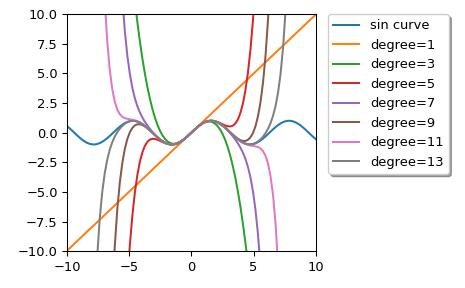

https://www.youtube.com/watch?v=3d6DsjIBzJ4

6. We are interested in capturing this notion of locality in Physical systems using PINNs. Of course, we are assuming that such "local effects" exist. If they do, it would be interesting and of value to build this locality into the NN architecture. In case we are in dark waters with a difficult problem and it is hard to swim to shore, that is use standard techniques, PINNs might be a promising solution. In such cases, we would want our NNs to be more than just "black-boxes". We would want them to be PINNs, and the "Physics-informed" part might come from the NN architecture
7. Now that we have briefly touched upon the notion of locality, we need to think of how we might get our NN architecture to "respect locality". Amongst standard NN architectures, CNNs have convolution layers that are created by sliding a fliter over the input and extracting the output computed from an element-wise multiplication between the filter weights and the input values in the domain at the location of the filter. In this manner, speaking loosely, the "outputs" in the convolution layer only correspond to a window in the "input domain" that is in some sense "local" to that "output"
8. This description of a CNN is very loose, at best intuitive and not in any way mathematically rigorous. However, rigorous investigations based on this intuition are worth carrying out and to that end, this tutorial attempts to investigate the use of CNNs and how they compare with ANNs for the very simple problem of sine wave regression
9. The author is also interested in implementing CNNs as part of their research project and this specific tutorial seemed to lay the foundations for that too!

## Import relevant packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

## Command to set device preference to GPU

1. GPU stands for "Graphical Processing Unit" and the GPU is capable of speeding up computations by carrying out multiple calculations simultaneously
2. The Python command below is an example where the "ternary operator" is being used

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Simple example of ternary operator

In [3]:
int_1 = 10
int_2 = 20
int_max = int_1 if int_1 > int_2 else int_2
print(int_max)

20


## Define CNN

### Notes on the NN architecture

1. We will focus on a "single-layer" network as it is the simplest choice that one can make in line with Occam's razor principle (https://en.wikipedia.org/wiki/Occam%27s_razor). Apart from this design choice, please note that the other "design choices" made here are arbitrary
2. Our focus in this tutorial will be on learning how to set up the CNN and ANN workflows in PyTorch to solve the simple sine-wave regression problem
3. The nn.Module is a fundamental building block in PyTorch for creating Neural Networks and therefore, all custom PyTorch modules should build on nn.Module by inheriting from it
4. The "super().." part ensures that the initialization protocol required by the Parent class is completed
5. The "init" part creates the "network skeleton" by specifying the "number of layers" and "number of neurons in each layer"
6. Here, we have a ANN with an input layer designed for a single feature, hidden layers with 10 neurons each, where the number of hidden layers is input by the user and an output designed again, for a single feature
7. We also have a CNN with an input layer designed for a single-channel and single-featured input, hidden layers with 10 channels (to be consistent with the 10 neurons in the ANN) generated by applying a convolution filter having a kernel size of 3 and stride of 1. A padding of 1 is used to maintain the same size throughout. The number of hidden layers are user-input. The output is again designed to be single-feature single-channel output
8. The "forward" method executes a "forward pass" on being called and uses the sigmoid activation function
9. Note that, again, the choice of the activation function is arbitrary just like all the other design choices made

### Notes on the Python syntax

1. In Python, the underscore (_) is commonly used as a variable name when the value assigned to it is meant to be discarded or is not going to be used within the loop or context it appears in
2. Specifically, in the context of the for _ in range(some_number) loop, it indicates that the loop variable is not going to be used within the loop body. This convention is often used when the loop count or iteration number is necessary, but the individual loop variable itself is not needed
3. Using the underscore in this way improves code readability
4. "nn.ModuleList" in PyTorch is a container used to hold a list of PyTorch modules, which allows for "dynamic creation" and management of layers within a neural network model
5. What do we mean by "dynamic creation"? - Imagine you have a big box of LEGO bricks. When you start building something with these bricks, you can decide what you want to create as you go. If you want to build a tall tower, you can keep adding more bricks one by one until it's as tall as you like. That's a bit like dynamic creation in PyTorch!
6. The opposite of "dynamic creation" is having everything already decided and fixed before starting. Imagine if you're following instructions to build a LEGO set, like a specific spaceship. The instructions tell you exactly how many pieces you need and in what order to put them together. You can't change it; you just follow the steps one after another
7. We will do a "Pythonic example" of the "opposite of dynamic creation" below, after defining the Network class for the NNs
8. When building neural network architectures in PyTorch, using "nn.ModuleList" allows you to create and manage a list of PyTorch modules (such as layers) in a way that the modules are recognized and tracked by PyTorch's computational graph. This means that all modules within the ModuleList are registered and managed by the parent "nn.Module"

In [4]:
class Network_CNN(nn.Module):
    def __init__(self, num_hidden_layers):
        super().__init__()
        
        input_size = 1
        hidden_size = 10
        self.input_layer = nn.Conv1d(input_size, hidden_size, kernel_size=3, stride=1, padding=1)
        self.hidden_layers = nn.ModuleList(
            [nn.Conv1d(hidden_size, hidden_size, kernel_size=3, stride=1, padding=1) for _ in range(num_hidden_layers)]
        )
        
        self.output_layer = nn.Conv1d(hidden_size, input_size, kernel_size=3, stride=1, padding=1)
    
    def forward(self, x):
        x = torch.sigmoid(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.sigmoid(layer(x))
        output = self.output_layer(x)
        return output

## Define ANN

In [5]:
class Network_ANN(nn.Module):
    def __init__(self, num_hidden_layers):
        super().__init__()
        input_size = 1
        hidden_size = 10
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layers = nn.ModuleList(
            [nn.Linear(hidden_size, hidden_size) for _ in range(num_hidden_layers)]
        )
        self.output_layer = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        x = torch.sigmoid(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.sigmoid(layer(x))
        output = self.output_layer(x)
        return output

## Pythonic Example of the "opposite of dynamic creation"

1. The number of hidden layers are "pre-defined" in this case
2. The structure is "fixed" and "hard-coded" in this case
3. There is no flexibility here
4. Contrastingly, in dynamic creation, the number of layers or their structure can be altered during runtime, giving more flexibility and adaptability to the network architecture based on certain conditions or requirements. Dynamic creation allows for creating or adjusting the architecture while using it, unlike the fixed, predetermined structure in this example

In [6]:
class Network_Fixed(nn.Module):
    def __init__(self, num_hidden_layers):
        super().__init__()
        self.input_layer = nn.Linear(1, 10)
        self.hidden_layer_1 = nn.Linear(10, 10)
        self.hidden_layer_2 = nn.Linear(10, 10)
        self.output_layer = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.sigmoid(self.input_layer(x))
        x = torch.sigmoid(self.hidden_layer_1(x))
        x = torch.sigmoid(self.hidden_layer_2(x))
        output = self.output_layer(x)
        return output

## Simple example of the "super" command

In [7]:
class Parent:
    def __init__(self, name):
        self.name = name

class Child(Parent):
    def __init__(self, name, age):
        # Call the constructor of the parent class
        super().__init__(name)
        self.age = age

# Create an instance of the Child class
child = Child("Alice", 5)

# Access attributes of both Parent and Child
print("Name:", child.name)
print("Age:", child.age)

Name: Alice
Age: 5


## Detailed explanation of the "super" command example (Optional)

1. There are two classes, "Parent" and "Child". "Child" is inheriting from Parent
2. The "Parent" class has an "__init__" method that takes a "name" argument and sets an instance variable "name"
3. The Child class has its own "__init__" method that takes both "name" and "age" arguments
4. When we create an instance of the "Child" class, as shown in the code, it inherits the "name" attribute from the "Parent" class and sets its "age" attribute. The "super().__init__()" call ensures that the initialization logic in the parent class is executed before the child class-specific initialization, allowing you to build on and extend the functionality of the parent class.

## Set number of hidden layers

Recall, that we wish to start with the simplest system and to that end, we are working with a "single-layered" network and therefore, we will set the "number of hidden layers" parameter equal to unity, for both the CNN and ANN

In [8]:
num_hidden_layers = 1

## Initialize CNN

In [9]:
N_CNN = Network_CNN(num_hidden_layers)
N_CNN = N_CNN.to(device)

## Initialize ANN

In [10]:
N_ANN = Network_ANN(num_hidden_layers)
N_ANN = N_ANN.to(device)

## MSE Loss Function for CNN

In [11]:
def loss_mse_CNN(x,y):
    y_pred = N_CNN(x)
    
    return torch.mean( (y-y_pred)**2 )

## MSE Loss Function for ANN

In [12]:
def loss_mse_ANN(x,y):
    y_pred = N_ANN(x)
    
    return torch.mean( (y-y_pred)**2 )

## Create toy data

1. We are using the "mathy" torch commands to initialize and work with all the "mathy" stuff!
2. The torch "mathy stuff" is very similar to the "numpy stuff" except that torch tensors have GPU support and can be automatically differentiated

In [13]:
x = torch.linspace(-np.pi, np.pi, 100)[:, None]
w = 1
y = torch.sin(w*x)

## What does "None" do?

The ":, None' part ensures that the torch tensor is a "column vector"

In [14]:
x_wo_none = torch.linspace(-np.pi, np.pi, 100)
x_wo_none.shape

torch.Size([100])

In [15]:
x_w_none = torch.linspace(-np.pi, np.pi, 100)[:, None]
x_w_none.shape

torch.Size([100, 1])

## Check shape of data

In [16]:
x.shape

torch.Size([100, 1])

In [17]:
y.shape

torch.Size([100, 1])

## Reshape data for CNN

1. The CNN here takes as input the entire input domain. For 1D convolution, the input domain is treated as a signal of length "L". The input shape needs to be in the following order: (N, C_in, L) where:
    1. N = batch size
    2. C_in = number of input channels
    3. L = Length of signal

2. Refer to the PyTorch documentation for exact details: https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html

3. Here, we are passing the entire signal as a single batch. We have a single-channel input domain having 100 elements. Therefore, our input shape needs to be the following: [1, 1, 100]

4. Thus, we need to reshape our data and we will do that as the next step

In [18]:
x_CNN = x.reshape([1,1,100])
y_CNN = y.reshape([1,1,100])

## Check shape after reshaping data

In [19]:
x_CNN.shape

torch.Size([1, 1, 100])

In [20]:
y_CNN.shape

torch.Size([1, 1, 100])

## Train NNs

1. The NNs are trained using the LBFGS optimizer
2. The LBFGS optimizer is a popular numerical algorithm used for unconstrained optimization problems and stands for "Limited-memory Broyden-Fletcher-Goldfarb-Shanno"
3. The choice of the LBFGS optimizer was again arbitrary just like the NN architecture, the reason being that the focus of this tutorial is not choosing the "optimal optimizer". That being said, in retrospect, the LBFGS optimizer is known to be globally convergent (convergence guaranteed independent of starting point) and is well-suited for a well-behaved loss-function landscape, which we have here!
4. The gradients are initialized to zero using the "optimizer.zero_grad()" command. This prevents "incorrect model updates" that could result from "gradient accumulation"
5. The closure function is designed to do a single step of backpropagation
6. The name "closure" is a popular choice in scientific computing and refers to a "self-contained" code block that abstracts the computations pertaining to the objective function and gradients, thus "closing" computations related to objective functions and gradients 
7. The for loop at the end of the code block trains the NN over multiple epochs by iteratively doing backpropagation using the closure function
8. An "epoch" refers to one complete pass through the entire dataset
9. We also grab the "intermediate output" since we are interested in animating the learning process down the road

## Train CNN

In [21]:
intermediate_output_CNN = []

optimizer_CNN = torch.optim.LBFGS(N_CNN.parameters())

def closure_CNN():
    optimizer_CNN.zero_grad()
    l_CNN = loss_mse_CNN(x_CNN,y_CNN)
    l_CNN.backward()

    return l_CNN

epochs_CNN = 20
for i_CNN in range(epochs_CNN):
    optimizer_CNN.step(closure_CNN)
    intermediate_output_CNN.append(N_CNN(x_CNN).reshape([100, 1]).to('cpu').detach().numpy())

## Create new variables for ANN training to be consistent with nomenclature

In [22]:
x_ANN = x
y_ANN = y

## Train ANN

In [23]:
intermediate_output_ANN = []

optimizer_ANN = torch.optim.LBFGS(N_ANN.parameters())

def closure_ANN():
    optimizer_ANN.zero_grad()
    l_ANN = loss_mse_ANN(x_ANN,y_ANN)
    l_ANN.backward()

    return l_ANN

epochs_ANN = 20
for i_ANN in range(epochs_ANN):
    optimizer_ANN.step(closure_ANN)
    intermediate_output_ANN.append(N_ANN(x_ANN).to('cpu').detach().numpy())

## Generate NN predictions

1. Since, we are not computing derivatives below, we use "torch.no_grad()"
2. "torch.no_grad()" might not be strictly required but since we are making a prediction and do not require gradient computations, using "torch.no_grad()" will save memory, processing time and is therefore, good practice!

## Create torch tensor corresponding to indepedent variable for NN prediction

In [24]:
xx = torch.linspace(-np.pi, np.pi, 100)[:, None]

## Generate CNN prediction

Note that the CNN output is obtained has the same shape as the input but recall that we reshaped our input data based on the requirements set by PyTorch. Therefore, we need to "invert" the process to get the "original shape" by performing another "reshape"

In [25]:
xx_CNN = xx.reshape([1,1,100])
with torch.no_grad():
    yy_CNN = N_CNN(xx_CNN)
yy_CNN = yy_CNN.reshape(xx.shape)

## Generate ANN prediction

In [26]:
xx_ANN = xx
with torch.no_grad():
    yy_ANN = N_ANN(xx_ANN)

## Convert torch arrays to numpy array for plotting

1. "detach()" essentially detaches the tensor from the computational graph, meaning that we do not need to worry about gradient computations
2. Recall that while torch tensors can be automatically differentiated, the same does not hold true for numpy arrays and we are currently converting our torch tensors to numpy arrays for plotting purposes

In [27]:
xx_plot = xx.to('cpu').detach().numpy()
yy_CNN_plot = yy_CNN.to('cpu').detach().numpy().reshape(xx_plot.shape)
yy_ANN_plot = yy_ANN.to('cpu').detach().numpy()

## Main Plot for results

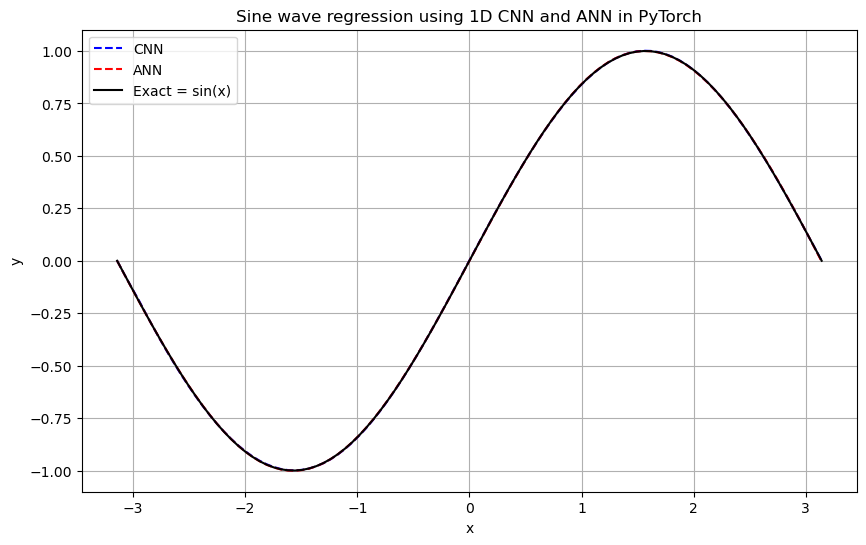

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(xx_plot, yy_CNN_plot, 'b--', label="CNN")
plt.plot(xx_plot, yy_ANN_plot, 'r--', label="ANN")
plt.plot(xx_plot, np.sin(w*xx_plot), 'k-', label="Exact = sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine wave regression using 1D CNN and ANN in PyTorch")
plt.legend()
plt.grid()
plt.show()

## Subplot for results

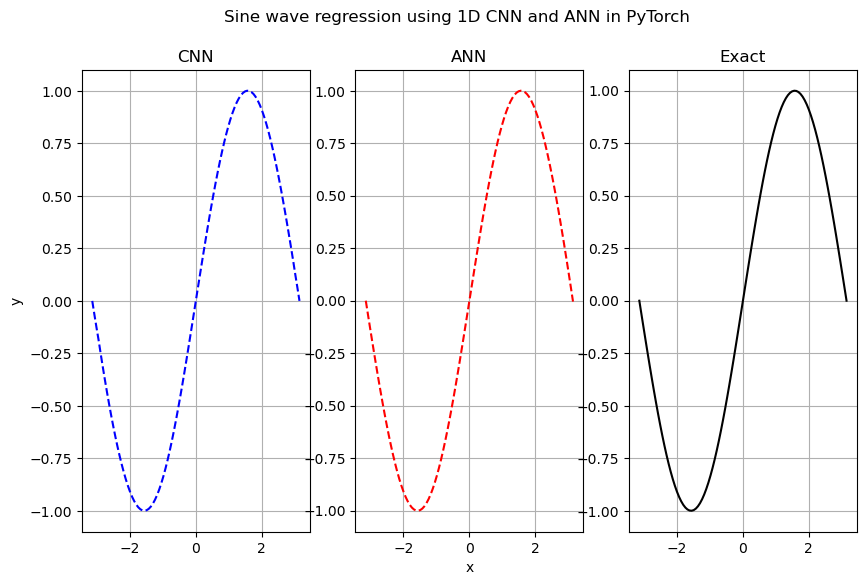

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 6))
fig.suptitle("Sine wave regression using 1D CNN and ANN in PyTorch")

ax1.plot(xx_plot, yy_CNN_plot, 'b--', label="CNN")
ax1.set_ylabel('y')
ax1.set_title('CNN')
ax1.grid()

ax2.plot(xx_plot, yy_ANN_plot, 'r--', label="ANN")
ax2.set_xlabel('x')
ax2.set_title('ANN')
ax2.grid()

ax3.plot(xx_plot, np.sin(w*xx_plot), 'k-', label="Exact = sin(x)")
ax3.set_title('Exact')
ax3.grid()

## Watching the networks learn through animation

1. Debugging Neural Networks is very difficult if your code has no obvious error
2. Watching how Neural Networks learn via animation can provide us with a nice tool to develop some intuition regarding the behavior of the network
3. We have created animations that show the output corresponding to the initial condition, the final output and the intermediate outputs (animated)
4. We first need to import the relevant libraries that let us create animations and view them in the jupyter notebook
5. Importing the libraries at the beginning of the code were giving me some strange errors which is why they are being imported here. Not that it really matters!
6. We also have a few flags that let you "switch on and off" the animations as per your interests

In [30]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

## Animation flags

In [31]:
view_CNN_animation = True
view_ANN_animation = True
save_CNN_animation = True
save_ANN_animation = True

## Watching the CNN learn through animation

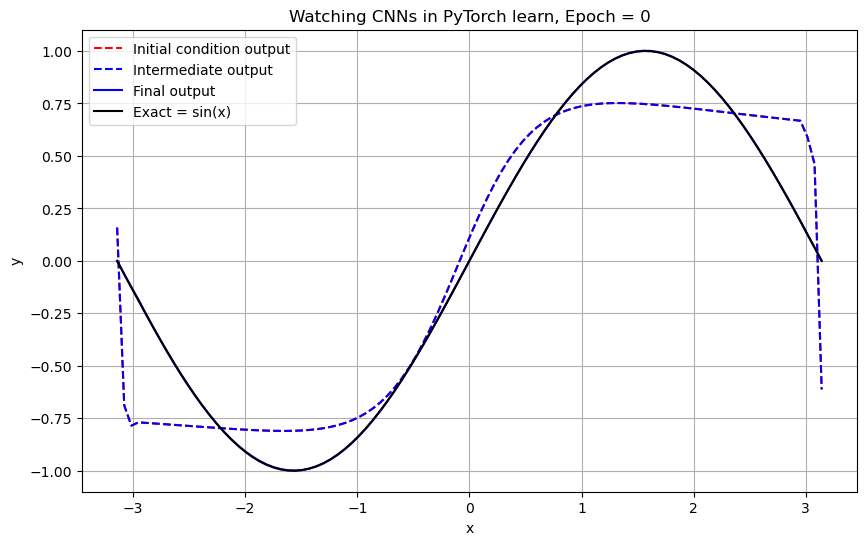

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

def update(j):
    ax.clear()
    ax.plot(xx_plot, intermediate_output_CNN[0], 'r--', label="Initial condition output")
    ax.plot(xx_plot, intermediate_output_CNN[j], 'b--', label="Intermediate output")
    ax.plot(xx_plot, intermediate_output_CNN[-1], 'b-', label="Final output")
    ax.plot(xx_plot, np.sin(w * xx_plot), 'k-', label="Exact = sin(x)")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Watching CNNs in PyTorch learn, Epoch = " + str(j))
    ax.legend()
    ax.grid()

CNN_ani = FuncAnimation(fig, update, frames=len(intermediate_output_CNN), interval=200)

## Display the CNN animation in notebook

In [34]:
if view_CNN_animation:
    display(HTML(CNN_ani.to_jshtml()))

## Save the CNN animation as a GIF

In [35]:
if save_CNN_animation:
    CNN_ani.save('CNN_animation.gif', writer='pillow', fps=1)

## Watching the ANN learn through animation

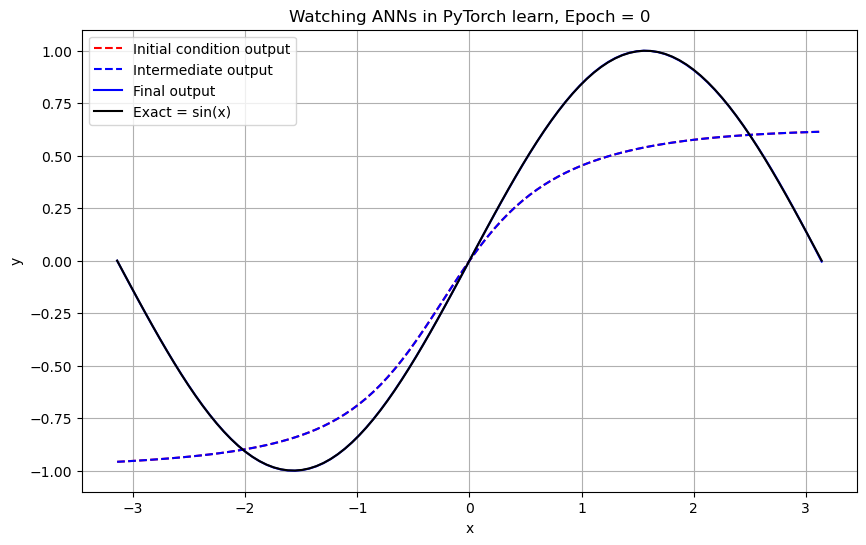

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

def update(j):
    ax.clear()
    ax.plot(xx_plot, intermediate_output_ANN[0], 'r--', label="Initial condition output")
    ax.plot(xx_plot, intermediate_output_ANN[j], 'b--', label="Intermediate output")
    ax.plot(xx_plot, intermediate_output_ANN[-1], 'b-', label="Final output")
    ax.plot(xx_plot, np.sin(w * xx_plot), 'k-', label="Exact = sin(x)")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Watching ANNs in PyTorch learn, Epoch = " + str(j))
    ax.legend()
    ax.grid()

ANN_ani = FuncAnimation(fig, update, frames=len(intermediate_output_ANN), interval=200)

## Display the ANN animation in notebook

In [38]:
if view_ANN_animation:
    display(HTML(ANN_ani.to_jshtml()))

## Save the ANN animation as a GIF

In [39]:
if save_CNN_animation:
    ANN_ani.save('ANN_animation.gif', writer='pillow', fps=1)

## Closing comments

1. We are satisfied with the "fitting" just based on "visual inspection" but a more rigorous analysis should consider the actual values of the point-wise error. That really was not the focus of this tutorial, did not naturally pose a problem at any point. Therefore, it was not discussed
2. The code block could be converted to functions and the workflow could be developed further to increase its versatility. This tutorial is focused on just setting up the workflow and providing a baseline template to work with
3. A visualization of the NN architecture will help enhance the "focus on visualization" in this tutorial and will be considered in version 2.0 and higher of this tutorial. A quick way to do this in today's age and day would be to ask ChatGPT to write such a code for us
4. Only the choice of having a single layer was made based on simplicity. The other NN design choices were arbitrary and this code template can be used as a starting point to systematically investigate the effects of various changes to NN design parameters on performance
5. The animation is a powerful tool to visualize the "NN learning process" and the animation block along with this code template can be used to experiment with various popular optimizers and visualize their convergence behavior
6. Reliability Analysis: Is this simple NN reliable? Will it converge to the correct output everytime the code is run? This is yet another simple problem statement that can be explored with this code template
7. Note that we have a sine wave with a "single period". The frequency parameter "w" can be tuned to investigate the effect of frequency or alternatively, number of periods on our model
8. The animation is a very powerful tool and can be used for debugging NNs. Usually, if your code has no syntax errors, and your NN does not converge, it is very hard to make sense of the NN behavior. I started off with a "deeper" network that was arbitrarily chosen. One of the reasons that I thought this made sense was because of the thumb tule - "deeper networks perform better". I had strange NN behavior where the NN would converge to the correct value only 50% of the time. Once, I built the animation tool, I found that the convergence looked "very erratic" and since most of the NN hyperparameters were set at default values, meaning that they are well-tested, I thought the only "custom" part of the network was the "number of layers" and "number of neurons". I then, applied Occam's razor principle and decided to use a "single-layered" network. I still kept the number of neurons arbitrary. Since, the "custom effect" due to the "number of layers" has a "larger effect" than the number of neurons per layer, it made sense to focus on reducing the number of layers. What has been presented in this tutorial is the "clean output" after the "messy debugging". In the future, we will do a tutorial where we will walk through using the "animation of NNs learning" as a "debugging tool". We will also demonstrate later on, how this "animation-debugger" can be used to discover the phenomenon of "early stopping" 